# This notebook checks the results after a simulation

In [1]:
#TODO Create list of edges of different types. Maybe start a sim and use traci to get it out of the system??


## init stuff

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import glob
from result_utils.results_utils import xml2csv_path
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#path = 'Experiment/Results'
#path = 'Motorway/Results'

In [14]:
os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: 'Motorway/Results'

In [39]:
if len(glob.glob(f'{path}/*.csv')) < len(glob.glob(f'{path}/*.xml')):
    print('Found fewer csv files than xml files. Converting results')
    xml2csv_path(path)
    print('finished converting')
else:
    print("All files seems converted.")

csv_files = glob.glob(f'{path}/*.csv')
csv_files

Found fewer csv files than xml files. Converting results
finished converting


['Motorway/Results/fullrunincident0.csv',
 'Motorway/Results/fullrun10.csv',
 'Motorway/Results/debug_test1.csv',
 'Motorway/Results/fullrunincident1.csv',
 'Motorway/Results/debug_test3.csv',
 'Motorway/Results/debug_test0.csv',
 'Motorway/Results/fullrun11.csv',
 'Motorway/Results/debug_test2.csv']

## Load csv files

In [40]:
results = pd.read_csv(csv_files[1], sep=';')
results = results[['edge_id', 'interval_begin', 'edge_density', 'edge_occupancy', 'edge_speed', 'edge_waitingTime', 'edge_timeLoss']]

In [41]:
results.head()

,edge_id,interval_begin,edge_density,edge_occupancy,edge_speed,edge_waitingTime,edge_timeLoss
0,106130759,0.0,4.91,0.62,26.99,0.0,38.57
1,106130759-AddedOffRampEdge,0.0,9.26,0.90,25.37,0.0,48.70
2,106130759.1186,0.0,9.04,1.13,27.25,0.0,36.89
3,106130759.1630,0.0,8.95,1.11,27.25,0.0,20.44
4,106130759.1868,0.0,8.82,1.09,27.23,0.0,21.06


In [42]:
results_table = results.pivot(index='edge_id', columns='interval_begin', values=['edge_speed','edge_density'])

In [43]:
results_table.edge_speed

interval_begin,0.0,600.0,1200.0,1800.0,2400.0,3000.0,3600.0,4200.0,4800.0,5400.0,...,80400.0,81000.0,81600.0,82200.0,82800.0,83400.0,84000.0,84600.0,85200.0,85800.0
edge_id,,,,,,,,,,,,,,,,,,,,,
106130759,26.99,27.17,27.38,27.11,26.91,26.90,27.07,27.10,27.65,26.91,...,26.84,26.87,26.95,27.30,26.70,27.17,27.05,27.24,26.90,26.99
106130759-AddedOffRampEdge,25.37,25.10,25.24,25.15,25.06,25.13,24.72,25.55,25.74,25.39,...,24.14,24.00,24.67,24.71,24.50,25.10,24.98,24.84,24.82,24.45
106130759.1186,27.25,27.15,27.33,27.15,26.97,26.80,27.18,27.12,27.56,27.05,...,26.71,26.73,27.03,27.05,26.76,27.14,27.20,26.84,26.97,26.91
106130759.1630,27.25,27.11,27.39,27.17,27.04,26.82,27.11,27.19,27.51,27.05,...,26.73,26.77,26.99,27.04,26.71,27.13,27.16,26.79,26.95,26.85
106130759.1868,27.23,27.03,27.40,27.16,27.04,26.79,27.10,27.20,27.51,27.02,...,26.75,26.73,26.99,27.00,26.74,27.14,27.10,26.77,26.96,26.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gneE2,27.36,26.69,27.19,27.06,26.54,27.82,26.97,26.53,27.45,26.13,...,27.18,27.02,26.91,26.71,26.97,26.96,27.06,26.92,26.91,27.02
gneE3,27.37,26.67,27.17,27.13,26.58,27.79,26.94,26.49,27.52,26.12,...,27.15,27.08,26.95,26.70,27.03,26.96,27.08,26.94,26.91,27.07
gneE4,27.37,26.79,27.15,27.18,26.60,27.72,26.99,26.50,27.52,26.13,...,27.14,27.09,26.98,26.67,27.04,26.95,27.12,26.96,26.98,27.04


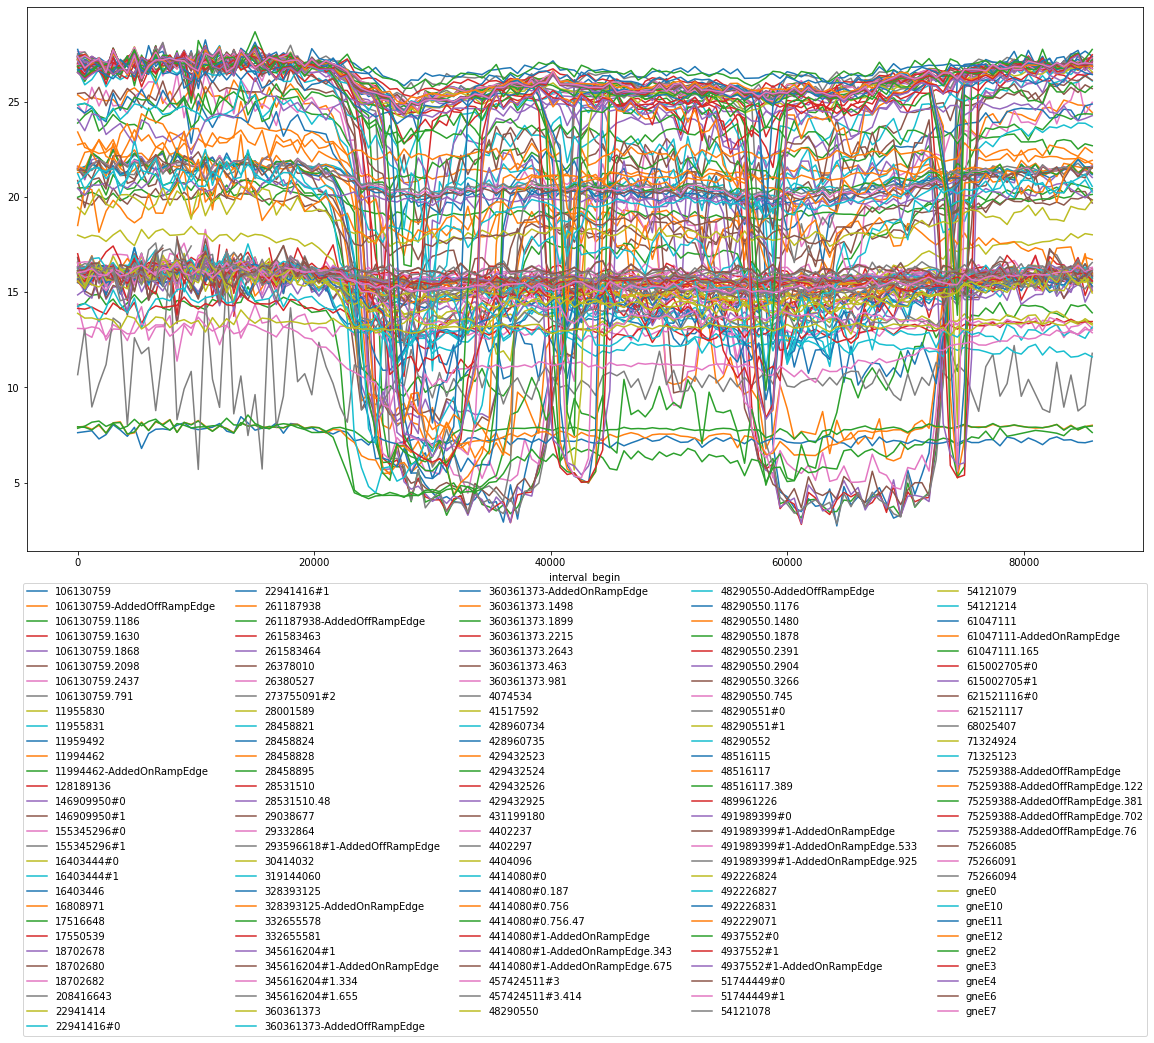

In [44]:
ax = results_table.edge_speed.T.plot(figsize=(20,10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

In [45]:
results_table.edge_density

interval_begin,0.0,600.0,1200.0,1800.0,2400.0,3000.0,3600.0,4200.0,4800.0,5400.0,...,80400.0,81000.0,81600.0,82200.0,82800.0,83400.0,84000.0,84600.0,85200.0,85800.0
edge_id,,,,,,,,,,,,,,,,,,,,,
106130759,4.91,4.63,4.64,4.49,3.64,4.15,3.68,3.68,3.66,3.52,...,8.23,7.25,6.16,6.28,6.16,6.16,6.09,6.18,6.10,5.80
106130759-AddedOffRampEdge,9.26,10.37,10.03,9.42,9.29,8.45,8.59,7.74,7.58,8.05,...,18.62,17.07,15.43,14.40,13.53,13.28,13.33,13.03,13.34,13.45
106130759.1186,9.04,9.43,8.88,8.40,8.52,7.63,7.55,7.10,7.00,7.21,...,16.07,14.90,13.37,13.03,11.93,12.00,11.89,11.78,11.84,11.89
106130759.1630,8.95,9.45,9.00,8.56,8.49,7.76,7.71,7.00,7.17,7.40,...,16.33,15.07,13.57,13.02,12.32,11.92,12.01,11.87,12.02,11.87
106130759.1868,8.82,9.56,8.97,8.54,8.46,7.82,7.74,7.04,7.18,7.27,...,16.32,15.22,13.54,13.05,12.36,11.89,12.05,11.92,11.98,11.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gneE2,5.02,8.41,7.23,7.20,4.80,4.34,4.92,4.55,3.52,2.84,...,22.45,20.83,20.24,21.03,18.58,19.42,19.17,17.86,16.61,16.19
gneE3,4.93,8.33,7.23,7.08,4.70,4.35,4.95,4.48,3.50,2.81,...,22.45,20.65,19.81,20.91,18.35,19.45,19.05,17.74,16.50,16.01
gneE4,4.88,8.29,7.08,7.19,4.68,4.30,4.93,4.48,3.50,2.74,...,22.35,20.82,19.38,20.91,18.60,19.23,19.10,17.70,16.52,15.83


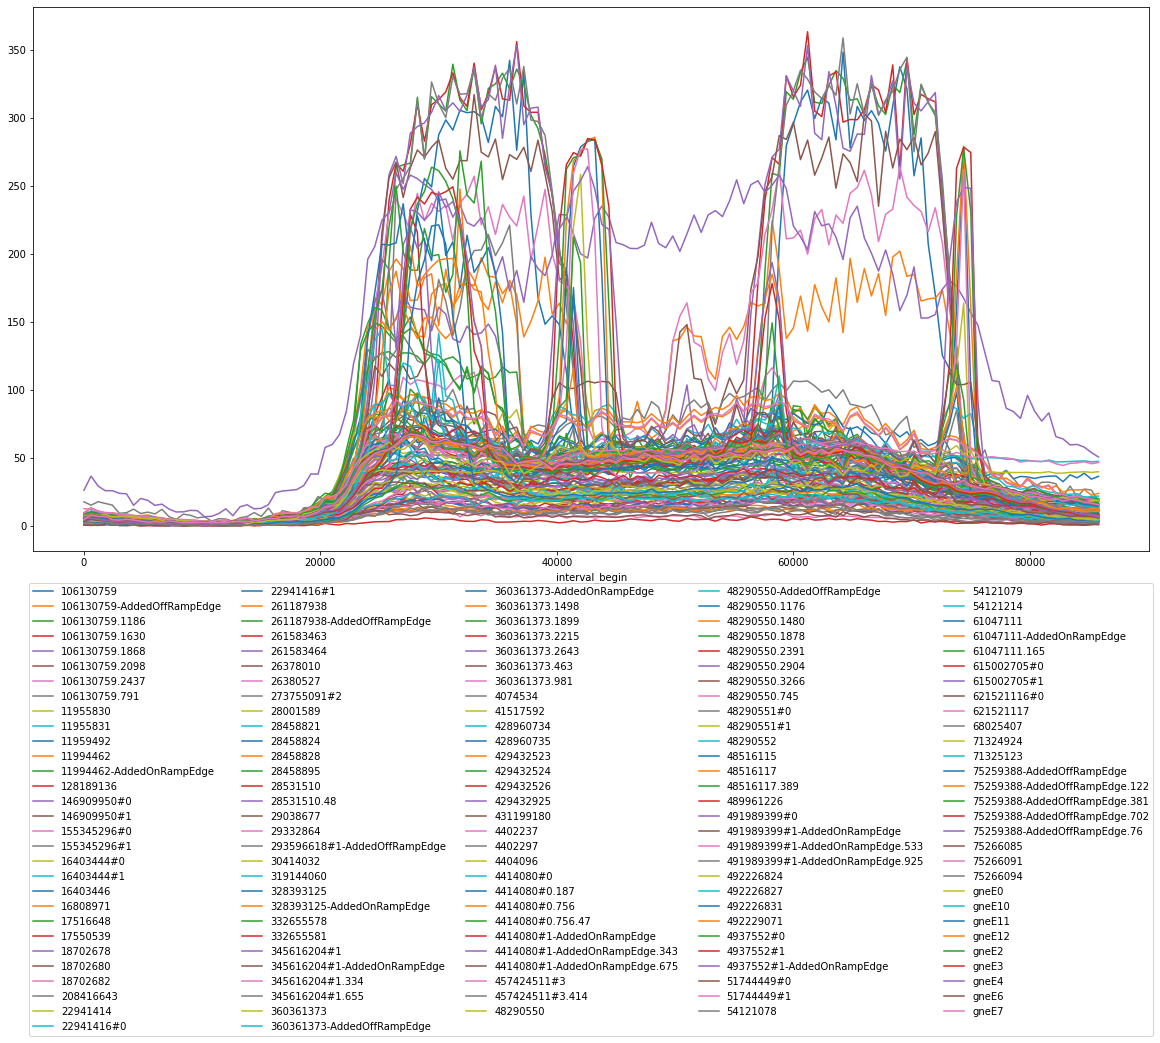

In [46]:
ax = results_table.edge_density.T.plot(figsize=(20,10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)